# Importing Libraries

In [21]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *

MaxIterations = 1000

# Function Definition

In [22]:
def BisectionMethod(f, A, B, TOL, N = MaxIterations):
    
    # Copy Input argument into local variable to avoid data over-writting
    a = copy.copy(A)
    b = copy.copy(B)

    print("\n\n***** BISECTION METHOD *****")
    i = 0
    
    data =[]        # list for storing data to plot table
    accuracy = []   # list for storing data to plot graph

    while i<=N:
        
        # Finding Midpoint
        m = (a+b)/2
        
        # Finding Function Value at a b and m
        fa = f(a)
        fm = f(m)
        fb = f(b)
        
        print(f'iteration = {i:3}  a = {a:.6f}  b = {b:.6f}  m = {m:.6f}  f(m) = {fm:.6f}')
        
        # Adding data in data list which was created for plotting table
        data.append([i,a,b,m,fm,fa,fb])
        
        if abs(fm) <=TOL and (abs(m-a)) <= TOL:
        # if (abs(m-a)) <= TOL:
            print(f'\nFinal Root Found')
            print(f'iteration = {i:3}  a = {a:.6f}  b = {b:.6f}  m = {m:.6f}  f(m) = {fm:.6f}')
            print(f"Required Root is: {m:.6f}")
            
            if fa*fm>0:
                accuracyReached = abs(a-m)
                a = m
            else:
                accuracyReached = abs(b-m)
                b = m
            
            accuracy.append([i,accuracyReached])
            break
               
        accuracyReached = 0
        
        # Checking Interval for next iteration
        if fa*fm>0:
            accuracyReached = abs(a-m)
            a = m
        else:
            accuracyReached = abs(b-m)
            b = m
        if abs(fm) ==TOL and accuracyReached <= TOL:
        # if (abs(m-a)) <= TOL:
            print(f'\nFinal Root Found')
            print(f'iteration = {i:3}  a = {a:.6f}  b = {b:.6f}  m = {m:.6f}  f(m) = {fm:.6f}')
            print(f"Required Root is: {m:.6f}")
        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([i,accuracyReached])

        i = i + 1       # Incrementing step count for next iteration


    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','a','b','m','f(m)'])
    for t in data:
        table.add_row(t[:-2])

    if i > N:
        print("Not Convergent")        
    return accuracy,table,data

# Input Section

In [23]:
def f(x):
    q = cos(x) 
    return q

x0 = 0.0
x1 = 2.0

e = 0.00001
BisectionMethod(f,x0,x1,e)



***** BISECTION METHOD *****
iteration =   0  a = 0.000000  b = 2.000000  m = 1.000000  f(m) = 0.540302
iteration =   1  a = 1.000000  b = 2.000000  m = 1.500000  f(m) = 0.070737
iteration =   2  a = 1.500000  b = 2.000000  m = 1.750000  f(m) = -0.178246
iteration =   3  a = 1.500000  b = 1.750000  m = 1.625000  f(m) = -0.054177
iteration =   4  a = 1.500000  b = 1.625000  m = 1.562500  f(m) = 0.008296
iteration =   5  a = 1.562500  b = 1.625000  m = 1.593750  f(m) = -0.022952
iteration =   6  a = 1.562500  b = 1.593750  m = 1.578125  f(m) = -0.007329
iteration =   7  a = 1.562500  b = 1.578125  m = 1.570312  f(m) = 0.000484
iteration =   8  a = 1.570312  b = 1.578125  m = 1.574219  f(m) = -0.003422
iteration =   9  a = 1.570312  b = 1.574219  m = 1.572266  f(m) = -0.001469
iteration =  10  a = 1.570312  b = 1.572266  m = 1.571289  f(m) = -0.000493
iteration =  11  a = 1.570312  b = 1.571289  m = 1.570801  f(m) = -0.000004
iteration =  12  a = 1.570312  b = 1.570801  m = 1.570557  f(

([[0, 1.0],
  [1, 0.5],
  [2, 0.25],
  [3, 0.125],
  [4, 0.0625],
  [5, 0.03125],
  [6, 0.015625],
  [7, 0.0078125],
  [8, 0.00390625],
  [9, 0.001953125],
  [10, 0.0009765625],
  [11, 0.00048828125],
  [12, 0.000244140625],
  [13, 0.0001220703125],
  [14, 6.103515625e-05],
  [15, 3.0517578125e-05],
  [16, 1.52587890625e-05],
  [17, 7.62939453125e-06]],
 [[0, 0.0, 2.0, 1.0, 0.5403023058681398, 1.0, -0.4161468365471424],
  [1,
   1.0,
   2.0,
   1.5,
   0.0707372016677029,
   0.5403023058681398,
   -0.4161468365471424],
  [2,
   1.5,
   2.0,
   1.75,
   -0.17824605564949209,
   0.0707372016677029,
   -0.4161468365471424],
  [3,
   1.5,
   1.75,
   1.625,
   -0.05417713502693632,
   0.0707372016677029,
   -0.17824605564949209],
  [4,
   1.5,
   1.625,
   1.5625,
   0.008296231623858378,
   0.0707372016677029,
   -0.05417713502693632],
  [5,
   1.5625,
   1.625,
   1.59375,
   -0.022951657653640416,
   0.008296231623858378,
   -0.05417713502693632],
  [6,
   1.5625,
   1.59375,
   1.57812

In [24]:
# Defining Function
def f(x):
    # q = x**(3)
    q = cos(x) - x*exp(x)
    return q

x0 = 0.0
x1 = 2.0

e = 0.001


# Calling Function

In [25]:
b_acc,Bisection_table,Bisection_data = BisectionMethod(f,x0,x1,e)



***** BISECTION METHOD *****
iteration =   0  a = 0.000000  b = 2.000000  m = 1.000000  f(m) = -2.177980
iteration =   1  a = 0.000000  b = 1.000000  m = 0.500000  f(m) = 0.053222
iteration =   2  a = 0.500000  b = 1.000000  m = 0.750000  f(m) = -0.856061
iteration =   3  a = 0.500000  b = 0.750000  m = 0.625000  f(m) = -0.356691
iteration =   4  a = 0.500000  b = 0.625000  m = 0.562500  f(m) = -0.141294
iteration =   5  a = 0.500000  b = 0.562500  m = 0.531250  f(m) = -0.041512
iteration =   6  a = 0.500000  b = 0.531250  m = 0.515625  f(m) = 0.006475
iteration =   7  a = 0.515625  b = 0.531250  m = 0.523438  f(m) = -0.017362
iteration =   8  a = 0.515625  b = 0.523438  m = 0.519531  f(m) = -0.005404
iteration =   9  a = 0.515625  b = 0.519531  m = 0.517578  f(m) = 0.000545
iteration =  10  a = 0.517578  b = 0.519531  m = 0.518555  f(m) = -0.002427
iteration =  11  a = 0.517578  b = 0.518555  m = 0.518066  f(m) = -0.000940

Final Root Found
iteration =  11  a = 0.517578  b = 0.51855

## Convergence Plot

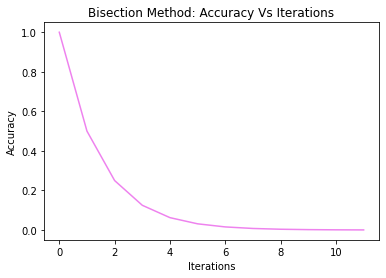

In [26]:
b_i = []
b_e = []
for i in b_acc:
    b_i.append(i[0])
    b_e.append(i[1])

plt.title("Bisection Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(b_i,b_e,color = 'violet')
plt.show()

## Bisection Table

In [27]:
print(Bisection_table)

+-----------+-------------+--------------+---------------+------------------------+
| Iteration |      a      |      b       |       m       |          f(m)          |
+-----------+-------------+--------------+---------------+------------------------+
|     0     |     0.0     |     2.0      |      1.0      |  -2.1779795225909053   |
|     1     |     0.0     |     1.0      |      0.5      |  0.05322192654030866   |
|     2     |     0.5     |     1.0      |      0.75     |  -0.8560611435856852   |
|     3     |     0.5     |     0.75     |     0.625     |   -0.356690603889921   |
|     4     |     0.5     |    0.625     |     0.5625    |    -0.1412937453091    |
|     5     |     0.5     |    0.5625    |    0.53125    |  -0.04151221167208241  |
|     6     |     0.5     |   0.53125    |    0.515625   |  0.006475340827341247  |
|     7     |   0.515625  |   0.53125    |   0.5234375   |  -0.01736202527677333  |
|     8     |   0.515625  |  0.5234375   |   0.51953125  | -0.00540440182766

## Function Plot

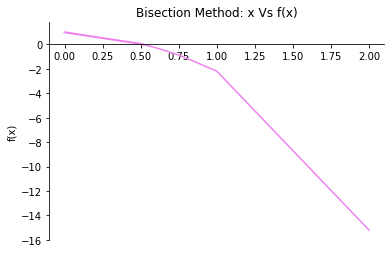

In [28]:
b_a =[]
b_b = []
b_fa =[]
b_fb =[]
for i in range(len(Bisection_data)):
    b_a.append(Bisection_data[i][1])
    b_b.append(Bisection_data[i][2])
    b_fa.append(Bisection_data[i][5])
    b_fb.append(Bisection_data[i][6])

    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')  # To move y-axis to center
ax.spines['bottom'].set_position(('data',0))    # To move x-axis to center

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.title("Bisection Method: x Vs f(x)")
plt.ylabel("f(x)")

plt.plot(b_a,b_fa,color='violet',linewidth=2)
plt.plot(b_b,b_fb,color='violet')
plt.show()